# Image Analysis Techniques
*The purpose of this project is to generate a 2D feature array of size 200x64. This array will be the input for a music-generating neural network.*

The feature array for any two images must be distinct. However, two similar images should have similar arrays, while distinct images must be vastly different. The array is an input for a neural network. Thus the specific numbers do not matter, but the patterns and variance will have a large effect over the style of music that is generated.

First we will look at what methods are available to us, then we will discuss how to apply them to the program.

# Methods

We will use two primary tools for analyzing images: colour, and keypoints

**Colour** will play a crucial role in image analysis, since colour choice typically sets the mood. A dark or monotonous image would typically be paired with somber or slower music. On the other hand, a vibrant image of primary colours would result in a quicker, happier song with more note variation.

*So how do we do this?*

**1. Colour Groupings:**
This stackoverflow solution [1] provides a method to determine the most prevalent colours, and their ratios in the image. An easier and less intensive method is to use colour groupings. One decides how many different categories to include (n), and divides the colour spectrum into n different "groups" of equal size.

Then each pixel in the image is classified to a different group, and a final count/ratio is formed.

    write about the output of the function and how that can be used

**2. Colour vs Greyscale:**
Images are 2D arrays of (r,g,b) tuples. A red pixel has a high r-value, and low g,b-values. Pixels along the grey spectrum (black, white, silver, grey, etc.) have the property of red = green = blue. Thus, pixels with a low variance between red, green and blue tend towards colours in the greyscale spectrum, while a high variance tends towards vibrant colours.

    show function to calculate variance for a tuple

A pixel with a high output from this function tends away from the grey spectrum. We will call this value the *vibrance* of the pixel, and subsequently the image. Images with higher vibrance will have more pronounced colours.

**3. Colour turbulence:**
Look at the two images below: both are half-white, half-black. Both score 0 on vibrance. Yet they have very distinct characteristics.

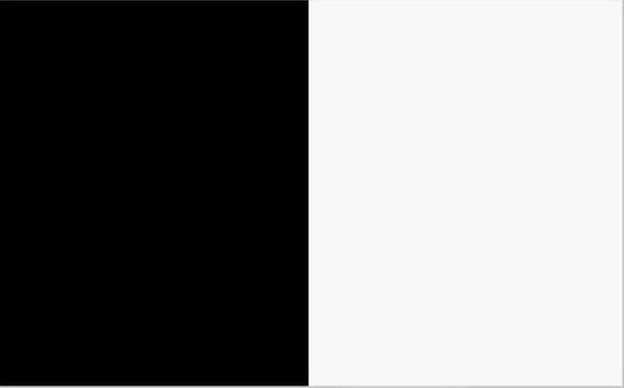
*Figure 1: black and white flag with vertical dividing line*
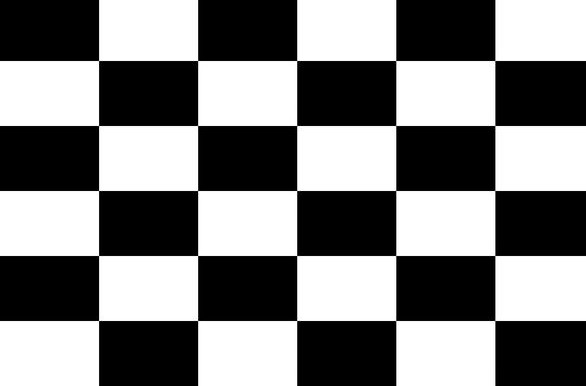
*Figure 2: black and white checkerboard pattern*
Image 1 is black on the left half and white on the right- the colour does not change frequently. Image 2, on the other hand, is constantly alternating between black and white. So how do we measure this?

Suppose you take a row from each image. Look at the (r,g,b) values:
For image 1, the value is (0,0,0) until the half-way point, when it switches to (255,255,255)
Image 2 switches between (0,0,0) and (255,255,255) five times.
These values can be expressed as the sum of differences between successive pixels, using the code sample below.

This can also be achieved using different paths. An ideal path would intersect the focal points for all images.

*note: similar information is achieved by finding key points. This is shown in the next section*

[1]https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv

In [2]:
#suppose each image has a width of 6 pixels
#row1 and row2 show the RGB values for those pixels
row1 = [(0,0,0),(0,0,0),(0,0,0),(255,255,255),(255,255,255),(255,255,255)]
#        black     b       b        white           w             w
row2 = [(0,0,0),(255,255,255),(0,0,0),(255,255,255),(0,0,0),(255,255,255)]
#          b          w          b          w          b          w
row3 = [(255,0,0),(255,0,0),(255,0,0),(255,255,255),(255,255,255),(255,255,255)]
#          red        r         r           w             w             w
row4 = [(255,0,0),(255,0,0),(255,0,0),(255,0,0),(255,255,255),(255,255,255)]
#           r         r         r         r           w             w
rows = [row1,row2,row3,row4]

def find_turbulence(row):
    turb = 0
    for px in range(len(row)-1):
        turb += find_tuple_diff(row[px+1],row[px])
    return turb

def find_tuple_diff(tuple1,tuple2):
    diff = 0
    for i in range(3):
        diff += abs(tuple2[i] - tuple1[i])
    return diff

turb = [find_turbulence(row) for row in rows]
for i in range(4):
    print('figure ',i,': ',turb[i])

figure  0 :  765
figure  1 :  3825
figure  2 :  510
figure  3 :  510


**Keypoints** are parts of the image that have a sudden transition from one colour to another. For example, the edge between a picture frame and the wall, or the shadow underneath a table.
Remember the images from colour turbulence? Using the KAZE feature analysis algorithm, image 1 has 0 keypoints, while image 2 has 200.

*I expected image 1 to have 1 keypoint due to the edge down the middle of the flag. I don't know why it has 0 instead.*

This seems to be a very similar measurement to colour turbulence. The primary difference is how the data is measured.
Firstly, a *feature analysis* to find keypoints of an image would return a vector for every distinct edge in an image. By counting the number of keypoints, you know how many times the image transitions steeply between two colours.
Colour turbulence, on the other hand, indicates how dramatic the colour change is.

Let's figure 1 again, this time compared to Figure 3 (below).
These images are identical except for colour. Thus they will have the same number of keypoints.
However, they can be distinguished by their colour turbulence values. Red has a value of (255,0,0), compared to black having (0,0,0).
Thus, figure 1 has a turbulence of 765 while figure 3 has a turbulence of 510.

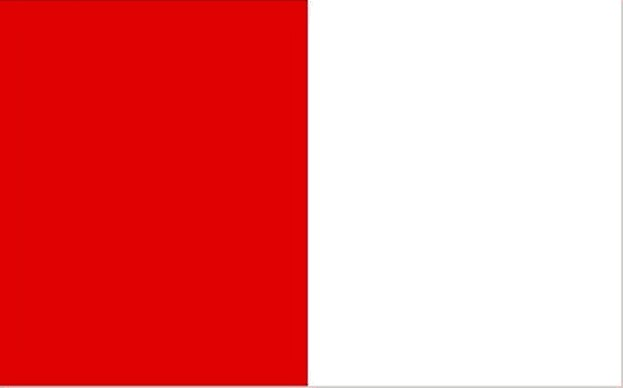
*Figure 3: red and white flag with vertical dividing line*

Now it may seem that colour turbulence provides more useful data than keypoints, but this is not quite true. Let's compare Figure 3 to Figure 4. We can see that these images are different, but the colour turbulence of any rows will be the same if the row intersects the white portion of figure 4.
On the other hand, feature analysis identifies 14 keypoints in figure 4 as compared to 0 in figure 3. Feature analysis provides data for the image in its entirety. It also ignores gradual gradients and light shading.

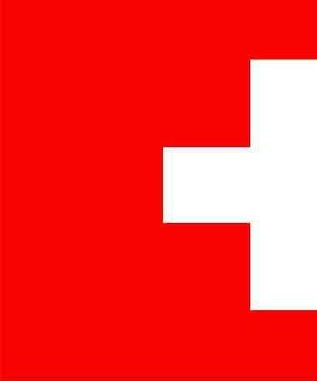
*Figure 4: cropped swiss flag*
